In [1]:
from aplf.kaggle.titanic import  graph
from distributed import Client, progress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
c = Client('dask-scheduler:8786')
c.restart()

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787/status,Cluster Workers: 1 Cores: 2 Memory: 16.67 GB


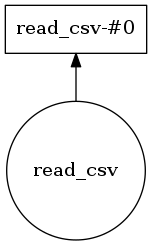

In [3]:
graph.train_df.visualize()

In [4]:
train_df = c.compute(graph.train_df, sync=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
preprocessed_train_df = c.compute(graph.preprocessed_train_df, sync=True)
preprocessed_train_df.head()

,FareBin,AgeBin,isAlone,TitleCode,Pclass,SexCode,Embarked,Survived
0,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]",0
1,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[1.0, 0.0, 0.0]",1
2,"[0.0, 1.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]",1
3,"[0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 1.0, 0.0, 0.0]","[1.0, 0.0]","[0.0, 0.0, 1.0]",1
4,"[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.0]","[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]","[0.0, 1.0]","[0.0, 0.0, 1.0]",0


In [7]:
print(preprocessed_train_df['isAlone'][0])

[1. 0.]


In [8]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
FareBin      891 non-null object
AgeBin       891 non-null object
isAlone      891 non-null object
TitleCode    891 non-null object
Pclass       891 non-null object
SexCode      891 non-null object
Embarked     891 non-null object
Survived     891 non-null int64
dtypes: int64(1), object(7)
memory usage: 55.8+ KB


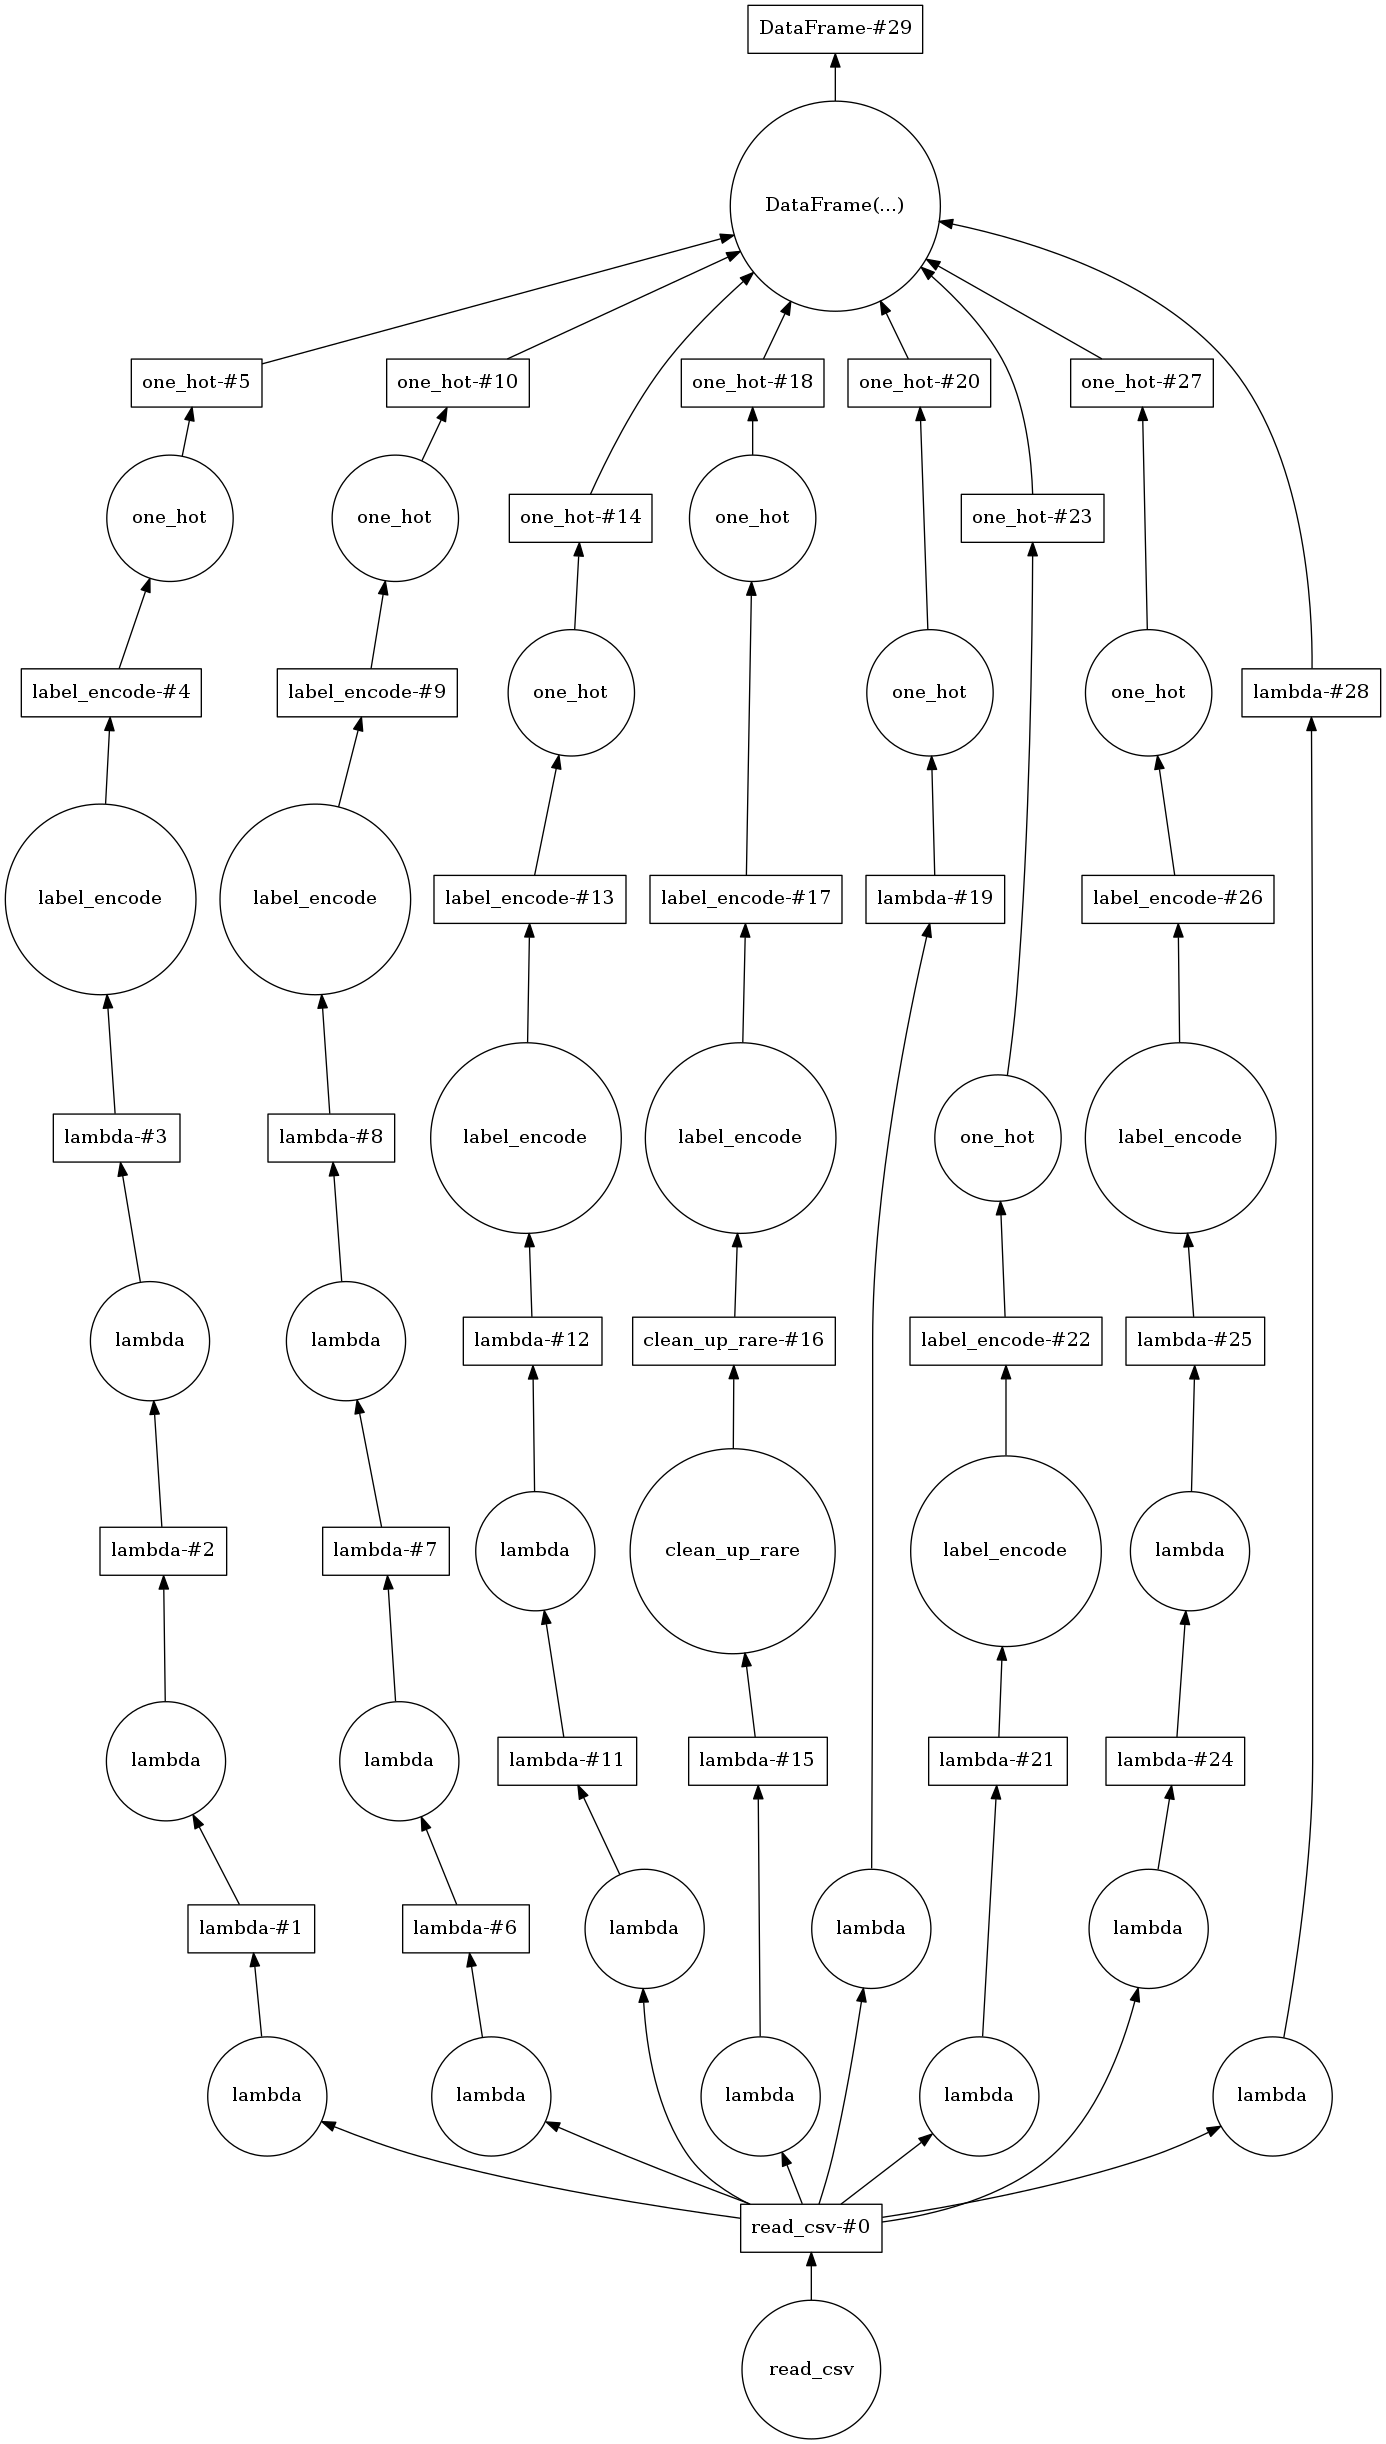

In [9]:
graph.preprocessed_train_df.visualize()

In [10]:
x = graph.predict_result # start computation in the background
progress(x)      # watch progress

VBox()

In [11]:
predict_df = x.compute()   
(preprocessed_train_df['Survived'] == predict_df).mean()

0.8282828282828283

tornado.application - ERROR - Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7f0300ea6158>, <Future finished exception=AttributeError("'MultiProgressWidget' object has no attribute 'elapsed_time'",)>)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 779, in _discard_future_result
    future.result()
  File "/opt/conda/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/opt/conda/lib/python3.6/site-packages/distributed/diagnostics/progressbar.py", line 234, in listen
    self._draw_stop(**response)
  File "/opt/conda/lib/python3.6/site-packages/distributed/diagnostics/progressbar.py", line 314, in _d